In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [7]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [9]:
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='softmax')])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val,y_val))

Epoch 1/10
844/844 [==============================] - 32s 31ms/step - loss: 0.5799 - accuracy: 0.7885 - val_loss: 0.3939 - val_accuracy: 0.8605
Epoch 2/10
844/844 [==============================] - 27s 32ms/step - loss: 0.3656 - accuracy: 0.8674 - val_loss: 0.3334 - val_accuracy: 0.8787
Epoch 3/10
844/844 [==============================] - 28s 33ms/step - loss: 0.3106 - accuracy: 0.8865 - val_loss: 0.2997 - val_accuracy: 0.8877
Epoch 4/10
844/844 [==============================] - 25s 30ms/step - loss: 0.2776 - accuracy: 0.8980 - val_loss: 0.2864 - val_accuracy: 0.8938
Epoch 5/10
844/844 [==============================] - 25s 30ms/step - loss: 0.2533 - accuracy: 0.9077 - val_loss: 0.2835 - val_accuracy: 0.8947
Epoch 6/10
844/844 [==============================] - 24s 28ms/step - loss: 0.2316 - accuracy: 0.9137 - val_loss: 0.2668 - val_accuracy: 0.8980
Epoch 7/10
844/844 [==============================] - 24s 29ms/step - loss: 0.2115 - accuracy: 0.9224 - val_loss: 0.2638 - val_accuracy:

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.2946 - accuracy: 0.9050
Test Accuracy: 90.50%


In [14]:
model.save('fashion_model.keras')

In [15]:
from tensorflow.keras.models import load_model
loaded_model = load_model('fashion_model.keras')

In [18]:
#Make predictions on new data
# Example input for prediction
sample_image = X_test[0:1]
# Predict the class probabilities
predicted_probabilities = loaded_model.predict(sample_image)
# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predicted_probabilities)
# Define the fashion category labels
fashion_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# Convert the predicted class index to the corresponding fashion category label
predicted_label = fashion_labels[predicted_class_index]
print(f"The predicted clothing category is: {predicted_label}")

The predicted clothing category is: Ankle boot


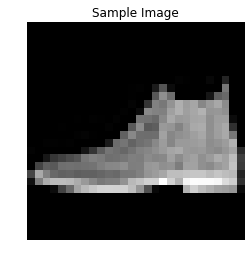

In [20]:
# Visualize the sample image
import matplotlib.pyplot as plt
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title("Sample Image")
plt.show()